# Notebook zu: Mathematik für Informatiker
## Band 1

©2001-2023 Gerald Teschl (http://www.mat.univie.ac.at/~gerald/) und Susanne Teschl (http://staff.technikum-wien.at/~teschl/)

Dieses Notebook ist als Ergänzung zu unserem Buch Mathematik für Informatiker, Band 1, 4. Aufl., Springer 2013, gedacht. Dort finden Sie auch weitere Erklärungen.

In [1]:
%display latex

## Logik und Mengen

### Mengen

Um mit symbollischen Variablen arbeiten zu können, müssen diese zuerst deklariert werden, da es sonst zu Fehlermeldungen kommt, dass die entsprechende Variable nicht definiert ist.

In [2]:
var('a','b','c','d','e')

(a, b, c, d, e)

Nun können wir Mengen mit dem Befehl `set` definieren:

In [3]:
A=set([a, b, c]); B= set([c,d,e]);

Vereinigung

In [4]:
A.union(B)

{c, a, d, b, e}

Durchschnitt

In [5]:
A.intersection(B)

{c}

Differenz

In [6]:
A.difference(B)

{b, a}

Werden Elemente mehrfach aufgelistet, so wird das automatisch bereinigt. Ebenso spielt die Reihenfolge der Elemente keine Rolle:

In [7]:
A= set([a,c,b,c]); B= set([c,b,a]);
A==B

True

Viele andere Mengenoperationen sind ebenfalls eingebaut.

### Logik

Wahr und Falsch sind ``True`` und ``False``. Die logischen Verküpfungen and, or, xor werden wie folgt eingegeben:

In [8]:
[ True and True, True or True, True ^^ True ]

[True, True, False]

Es gibt auch ein Paket mit dem man logische Formeln manipulieren kann. Die Notation für die Eingabe ist wie folgt:
* Negation `~`
* Und `&`
* Oder `|`
* Xor `^`
* Subjunktion `->`
* Bijunktion `<->`

In [9]:
import sage.logic.propcalc as propcalc
f = propcalc.formula("~(a&b)")

Konjunktive Normalform

In [10]:
f.convert_cnf()
print(f)

(~a|~b)


Wahrheitstabelle

In [11]:
f.truthtable()

a      b      value
False  False  True   
False  True   True   
True   False  True   
True   True   False

## Zahlenmengen und Zahlensysteme

### Approximation von sqrt(2)

Das auf im Buch beschriebene Programm zur Annäherung der Wurzel aus 2 kann mit Sage wie folgt  implementiert werden:

In [12]:
def approx(q):
    p=q
    while p^2<2*q^2: p+=1
    return( [ (p-1)/q, p/q] )

approx(100)   

[141/100, 71/50]

### Ungleichungen

Ungleichungen können mit `solve` gelöst werden:

In [13]:
x, y = var('x, y')
solve([x/(x^2+y^2) < 1/y, x>0, y>0], x, y)

[[0 < x, 0 < y, x^2 - x*y + y^2 > 0]]

Sage erkennt hier aber nicht, dass die Ungleichung immer richtig ist. Bei dem nächsten Beispiel klappt es besser:

In [14]:
solve(1-x^2>0, x)

[[x > -1, x < 1]]

### Komplexe Zahlen

Mit komplexen Zahlen rechnet man folgendermaßen:

In [15]:
z1 = 1 + 2*I; z2 = 3 - I; z1/z2

7/10*I + 1/10

Die imaginäre Einheit wird als großes I eingegeben. Real - bzw. Imaginärteil, komplexe Konjugation und Absolutbetrag erhält man mit

In [16]:
[real(z1), imag(z2), conjugate(z1), abs(z1) ]

[1, -1, -2*I + 1, sqrt(5)]

Manchmal ist `simplify` notwendig

In [17]:
simplify(real(sqrt(1+I*sqrt(3))))

1/2*sqrt(3)*sqrt(2)

### Summen- und Produktzeichen

Summen $\sum_{k=1}^n a_k$ berechnet man mit `sum(a_k,k,1,n)`

In [18]:
var('k n')
sum(k, k, 1, n)

1/2*n^2 + 1/2*n

und Produkte $\prod_{k=1}^n a_k$ mit `product(a_k,k,1,n)`

In [19]:
product(k, k, 1, n)

factorial(n)

Wie nicht schwer zu erraten, bezeichnet `factorial(n)` die Fakultät $n!$.

### Umwandlung zwischen Zahlensystemen

Mit `x.digits(base=b)` erhalten wir die Zahlendarstellung von x zur Basis b um. Zum Beispiel

In [20]:
12.digits(base=2)

[0, 0, 1, 1]

In die andere Richtung geht es mit

In [21]:
int('FAD',16)

4013

### Teilbarkeit und Primzahlen

Mit dem Befehl `is_prime` kann man feststellen, ob eine Zahl eine Primzahl ist:

In [22]:
is_prime(4)

False

Die Primfaktorzerlegung erhalten wir mit

In [23]:
factor(180)

2^2 * 3^2 * 5

Der größte gemeinsame Teiler kann mit dem Befehl `gcd` ("greatest common divisor") berechnet werden:

In [24]:
gcd(75,38)

1

Die Zahlen 75 und 38 sind also teilerfremd. Der Rest der Division einer ganzen Zahl x durch die natürliche Zahl m wird mit `mod(x, m)` erhalten:

In [25]:
mod(22,5)

2

Der Quotient der Division wird mit

In [26]:
22 // 5

4

berechnet. Also ist 22 = 4*5 + 2.

## Elementare Begriffe der Zahlentheorie

### Modulare Arithmetik

Wenn wir in $\mathbb{Z}_n$ rechnen wollen, dann können wir das wie folgt machen:

In [27]:
n=5; Z_n = Integers(n)

Nun können wir a als Element von $\mathbb{Z}_n$ deklarieren

In [28]:
a=Z_n(27); a

2

und aller weiteren Berechnungen werden in $\mathbb{Z}_n$ ausgeführt:

In [29]:
[-a, a+3, a**-1 ]

[3, 0, 3]

Alternativ können Potenzen modulo n auch wie folgt berechnet werden:

In [30]:
pow(3,2,n)==power_mod(3, 2, n)

True

und das multiplikative Inverse erhält man mit

In [31]:
inverse_mod(2, n)==power_mod(2, -1, n)

True

Die Euler'sche Phi-Funktion steht auch zuer Verfügung:

In [32]:
euler_phi(1400)

480

### Euklid'scher Algorithmus

Der Euklid'sche Algorithums ist leicht implementiert

In [33]:
def euklid(a,b):
    while(b!=0):
        a, b = b, a % b
    return a

euklid(75,38)

1

und ebenso die erweiterte Variante

In [34]:
def extended_euklid(a,b):
    x, xx, y, yy = 1, 0, 0, 1
    while(b!=0):
        q = a // b
        a, b, x, xx, y, yy = b, a % b, xx, x-q*xx, yy, y-q*yy
    return [a, x, y]

extended_euklid(75,38)

[1, -1, 2]

Natürlich ist er auch eingebaut:

In [35]:
xgcd(75,38)

(1, -1, 2)

### RSA

Die Verschlüsselung mittels RSA-Algorithmus ist natürlich zu aufwändig, um sie von Hand durchzuführen. Wir wollen uns hier von Sage helfen lassen: Zuerst wandeln wir die Buchstaben im Text, den wir verschlüsseln wollen, in Zahlen um:

In [36]:
y=[]
for x in 'KLEOPATRA':
    y.append(ord(x)-65)
y

[10, 11, 4, 14, 15, 0, 19, 17, 0]

Das ist nun der in Zahlen codierte Klartext, der verschlüsselt werden soll. Für die Verschlüsselung von x benötigen wir den öffentlichen Schlüssel

In [37]:
n=1147
e=29

Nun können wir mit der Vorschrift $y = x^e \pmod{n}$ verschlüsseln:

In [38]:
[pow(i,e,n) for i in y]

[803, 730, 132, 547, 277, 0, 979, 42, 0]

Bei unserem kurzen Spielzeugschlüssel ist es natürlich kein Problem den Algorithmus zu knacken indem man n faktorisiert:

In [39]:
factor(n)

31 * 37

Mit den Primfaktoren p = 31 und q = 37 können wir m berechnen:

In [40]:
m = (31 - 1)*(37 - 1)
m

1080

m kann auch alternativ mittels `euler_phi` berechnet werden:

In [41]:
euler_phi(n)

1080

Der geheime Schlüssel d ist nun die Lösung der Gleichung e d = 1 (mod m), wobei e = 29 der öffentliche Schlüssel ist und m = 1080 gerade gefunden wurde. d kann nun mit dem Befehl `pow` berechnet werden:

In [42]:
pow(e,-1,m)

149

In [43]:
reset('x y n m d e')

### Chinesischer Restsatz

Kongruenzen kann man mit dem Befehl

In [44]:
crt([2, 3, 2], [3, 5, 7])

23

lösen. Die erste Liste enthält die Reste und die zweite die Module.

## Polynomringe und endliche Körper

### Faktorisieren

Polynome können mit dem Befehl

In [45]:
var('x')
factor(x^3-1)

(x^2 + x + 1)*(x - 1)

faktorisiert und mit dem Befehl

In [46]:
expand(_)

x^3 - 1

ausmultipliziert werden. Eine Faktorisierung erfolgt nur, wenn die Nullstellen rationale Zahlen sind.

### Polynomdivision

Um eine Polynomdivision durchzuführen muss Sage das Problem an Maxima weiterreichen:

In [47]:
f(x)=3*x^4 + x^3 - 2*x
g(x)=x^2 + 1
q, r = f.maxima_methods().divide(g)

Der Rückgabe wert ist eine Liste aus Quotient und Rest.

In [48]:
expand(q*g(x)+r)

3*x^4 + x^3 - 2*x

### Rechnen im Polynomring

Wir können auch in einem Polynomring rechnen. Zum Beispiel im Polynomring $\mathbb{Q}[x]_{x^3}-1$:

In [49]:
R=QQ['x'].quotient(x^3 - 1, 'x')

Nun können wir ein Polynom als Element dieses Rings deklarieren und damit rechnen:

In [50]:
a=R(x^4+6)
b=R(x+7)
[ a, b, a+b, a*b, a^-1 ]

[x + 6, x + 7, 2*x + 13, x^2 + 13*x + 42, 1/217*x^2 - 6/217*x + 36/217]

Wir können die Rationalen Zahlen auch durch $\mathbb{Z}_n$ ersetzen:

In [51]:
n=5
R_n=Integers(n)['x'].quotient(x^3 - 1, 'x')

In [52]:
a=R_n(x^4+6)
b=R_n(x+7)
[ a, b, a+b, a*b, a^-1 ]

[x + 1, x + 2, 2*x + 3, x^2 + 3*x + 2, 3*x^2 + 2*x + 3]

Polynome können auch über $\mathbb{Z}_n$ faktorisiert werden:

In [53]:
Z_2=Integers(2)['x']
a=Z_2(x^8+x^4+x^3+x+1)
factor(a)

x^8 + x^4 + x^3 + x + 1

Das Polynom $x^8 + x^4 + x^3 + x + 1$ ist also über $\mathbb{Z}_2$ irreduzibel. Über  $\mathbb{Z}_3$ ist es reduzibel:

In [54]:
Z_3=Integers(3)['x']
a=Z_3(x^8+x^4+x^3+x+1)
factor(a)

(x^2 + 1) * (x^2 + x + 2) * (x^4 + 2*x^3 + x^2 + x + 2)

## Folgen und Reihen

### Folgen

Mit Sage können wir eine Folge einfach als eine Funktion definieren,

In [55]:
a(n)=1/2^n

und damit leicht Folgenglieder berechnen:

In [56]:
[a(n) for n in range(1,5) ]

[1/2, 1/4, 1/8, 1/16]

Man beachte, dass beim Python-Befehl `range(m,n)` der letzte Wert nicht dabei ist: m,m+1,...,n-1.

Rekursiv definierte Folgen können als rekursiv definierte Funktion eingegeben werden, wie hier die Heron' sche Folge mit Startwert $a_1=2$,

In [57]:
def a(n):
    if n==1: return 2.
    return (a(n-1)+2/a(n-1))/2

[a(n) for n in range(1,5) ]

[2.00000000000000, 1.50000000000000, 1.41666666666667, 1.41421568627451]

Warnung: Unsere Funktion funktioniert zwar, ist aber nicht sehr effizient, da sich in jeder Stufe die Funktion zwei mal selbst aufruft, was zu einem exponentiellen Anstieg an Aufrufen führt! Besse wäre:

In [58]:
def a(n):
    ans=2.
    for i in range(1,n):
        ans= (ans+2/ans)/2
    return ans

[a(n) for n in range(1,5) ]

[2.00000000000000, 1.50000000000000, 1.41666666666667, 1.41421568627451]

Die Folge für die Euler' sche Zahl lautet

In [59]:
a(n)=(1+1/n)^n

und die im Buch gesuchten Folgenglieder sind:

In [60]:
[N(a(n)) for n in [2,3,10,100,1000,100000] ]

[2.25000000000000,
 2.37037037037037,
 2.59374246010000,
 2.70481382942153,
 2.71692393223589,
 2.71826823717449]

Erinnern Sie sich, dass der Befehl `N` bewirkt, dass das Ergebnis numerisch angezeigt wird. Der Grenzwert einer Folge kann mit dem Befehl `limit` berechnet werden :

In [61]:
limit(a(n),n=infinity)

e

Einen numerische Wert von e auf 30 Stellen genau erhalten wir mit

In [62]:
N(e,digits=30)

2.71828182845904523536028747135

### Heron'sche Folge

Ein Programm zur Berechnung von Wurzeln mithilfe der Heron'schen Folge kann in Sage so implementiert werden:

In [63]:
def my_sqrt(x):
        r=N(x)
        rr=(r+x/r)/2
        while rr != r:
            r=rr
            rr=(r+x/r)/2
        return(rr)

my_sqrt(2)

1.41421356237309

Dabei wird r mit dem numerischen Wert von x initialisiert (rechnen wir symbolisch, so würden wir endlos iterieren; -). Dann wird in jedem Schritt der letzte Wert als r gespeichert und ein neuer Wert rr berechnet, bis sich der Wert nicht mehr ändert.

### Reihen

Mit Sage berechnet man den Grenzwert einer Reihe mit:

In [64]:
var('k')
sum(1/2^k, k, 0, infinity)

2

Die n-te Teilsumme erhalten wir mit

In [65]:
var('k n')
s(n)=sum(1/k^2, k, 1, n)

bzw.numerische Werte davon mit

In [66]:
[s(n) for n in range(1,5) ]

[1, 5/4, 49/36, 205/144]

Der Grenzwert dieser Reihe ist

In [67]:
var('k')
sum(1/k^2, k, 1, infinity)

1/6*pi^2

## Kombinatorik

### Fakultät und Bimomialkoeffizient

In Mathematica wird die Fakultät mit

In [68]:
factorial(6)

720

und der Binomialkoeffizient mit

In [69]:
binomial(45,6)

8145060

berechnet.

## Rekursionen und Wachstum von Algorithmen

### Iteration und Chaos

Um Folgenglieder einer rekursiv definierten Folge effektiv zu berechnen, bietet sich eine For-Schleife an:

In [70]:
mu=2.2
f(x)= x+ mu*(1-x)*x
fn= [0.1]
for i in range(4):
        fn.append(f(fn[i]))
fn

[0.100000000000000,
 0.298000000000000,
 0.758231200000000,
 1.16152782416243,
 0.748765887452052]

Ein "Spinnennetz" erzeugt man sich wie folgt:

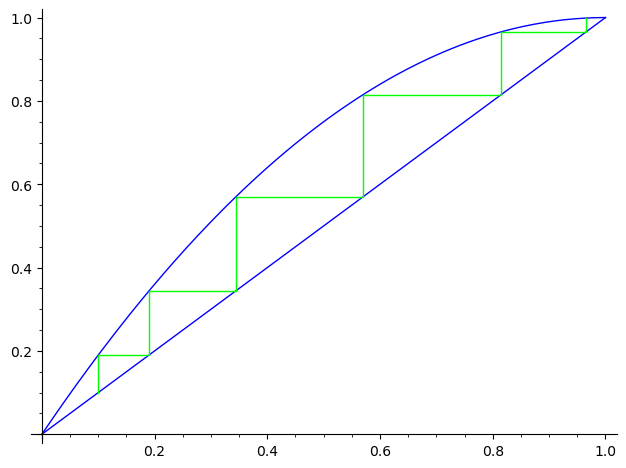

In [71]:
mu=1
f(x)= x+ mu*(1-x)*x
x0=0.1
pl=plot(f, (0,1))+plot(lambda x: x, (0,1))
web=[]
x=x0
for i in range(6):
        y=f(x)
        web.append([x,x])
        web.append([x,y])
        x= y
pl+=line(web, rgbcolor = (0,1,0))
show(pl)

### Lösung einer Rekursion

In Sage können Rekursionen mit dem Befehl `rsolve` gelöst werden.

In [72]:
from sympy import Function, rsolve
var('n')
a = Function('a')
rsolve(a(n) - 3*a(n-1) +4, a(n))

3**n*C0 + 2

In [73]:
a(n)=rsolve(a(n) - a(n-1) - 6*a(n-2), a(n), {a(0): 1, a(1):8})

In [74]:
a(3)

62

### Landau

Die folgende Funktion versucht das Landausymbol O(f(n)) eines Ausdrucks f(n) zu vereinfachen. Terme in Produkten die unabhängig von n sind werden entfernt und in einer Summe wird mithilfe des Genzwerts der am stärksten steigende Term gesucht. Nicht perfekt, aber ein erster Anfang.

In [75]:
var('n')
def landau_O(expr):
    expr=expand(expr)
    if expr.operator() == (2*n).operator(): # Produkt
        ops=expr.operands()
        for o in ops:
            if not(o.has(n)):
                ops.remove(o)
            if o.operator() == log(n+1).operator(): # Log
                oo=landau_O(o.operands()[0])
                if oo.operator() == (n^2).operator(): # Power
                    if not(oo.operands()[1].has(n)):
                        oo=n
                ops.remove(o)
                ops.append(log(oo))
        expr=product(ops)
    if expr.operator() == (1+n).operator(): # Summe
        ops=expr.operands()
        o=ops.pop()
        for oo in ops:
            if limit(oo/o,n=infinity)==0:
                ops.remove(oo)
            elif limit(o/oo,n=infinity)==0:
                ops.remove(oo)
                o=oo
        ops.append(o)
        return landau_O(sum(ops))
    return expr

landau_O(n*(n+1)+2*n^3 + n^3*log(3*n^2))

n^3*log(n)

## Vektorräume

### Vektoren

Vektoren erzeugt man mit `vector`:

In [76]:
a=vector([1,2,0,-1])
b=vector([3,0,1,2])
3*a-b

(0, 6, -1, -5)

Die Länge eines Vektors wird mit

In [77]:
norm(a)

sqrt(6)

berechnet.

## Matrizen und Lineare Abbildungen

### Matrizen

Matrizen werden mit `matrix` aus verschachtelten Listen erzeugt:

In [78]:
A=matrix([[1, 3, 2], [-1, 4, 5]])
B=matrix([[-2, 4, 0], [6, 2, -8]])

Summe und Multiplikation mit einem Skalar werden wie erwartet gebildet:

In [79]:
2*(A+B)

[-2 14  4]
[10 12 -6]

Die Dimension einer Matrix kann mit dem Befehl `dimensions` überprüft werden:

In [80]:
A.dimensions()

(2, 3)

Die transponierte Matrix erhalten wir mit

In [81]:
transpose(A)

[ 1 -1]
[ 3  4]
[ 2  5]

und die Einheitsmatrix mit

In [82]:
matrix.identity(2)

[1 0]
[0 1]

Eine Diagonalmatrix erhalten wir mit

In [83]:
matrix.diagonal([1,2,3])

[1 0 0]
[0 2 0]
[0 0 3]

### Multiplikation von Matrizen

Die Multiplikation von Matrizen folgt wie gewohnt

In [84]:
A=matrix([[4,2,0],[-1,3,5]])
B=matrix([[2,1],[3,7],[1,0]])
A*B

[14 18]
[12 20]

Analog funktionieren Potenzen

In [85]:
M=matrix([[7,1],[2,5]])
M^2

[51 12]
[24 27]

### Eingabe von Gleichungen mit Matrizen

Lineare Gleichungen können wie folgt gelöst werden:

In [86]:
var('x1 x2')
A=matrix([[5,3],[2,-1]])
b=vector([2,3])
A.solve_right(b)

(1, -1)

### Inverse Matrix

Die inverse Matrix kann als inverse Potenz berechnet werden:

In [87]:
A= matrix([[2, 4], [-1, 3]])
A^-1

[3/10 -2/5]
[1/10  1/5]

## Lineare Gleichungen

### Gauß-Algorithmus

Eine Möglichkeit lineare Gleichungen mit `A.solve_right(b)` zu lösen haben wir bereits kennen gelernt. Eine weitere Möglichkeit ist der `solve` Befehl:

In [88]:
var('x y z')
solve([y + 3*z == 2, x + 2*y + 5*z == 0, 2*x + 5*y + 13*z == 2], [x, y, z])

[[x == r1 - 4, y == -3*r1 + 2, z == r1]]

Da die Lösung nicht eindeutig ist, hat Sage einen Parameter r1 eingeführt.

Alternativ kann Sage ein lineares Gleichungssystem auch auf die Endform des Gauß-Jordan-Algorithmus (reduzierte Zeilenstufenform) bringen. Wir geben dazu die erweiterte Koeffizientenmatrix ein, und verwenden dann die Anweisung `rref`. Für das Beispiel aus dem Buch ergibt sich dann:

In [89]:
A=matrix([[1, -1, -1, 0],
 [-1, 0, -3, -11],
 [4, -1, 2, 15]])
A.rref()

[ 1  0  0  2]
[ 0  1  0 -1]
[ 0  0  1  3]

### Rang, Kern und Bild

In Sage kann eine Basis für den Kern mit dem Befehl `kernel` berechnet werden.

In [90]:
A = matrix([[1, 1, 2], [0, 1, 1], [1, 0, 1]])
A.kernel()

Free module of degree 3 and rank 1 over Integer Ring
Echelon basis matrix:
[ 1 -1 -1]

Eine Basis für das Bild von $A$ erhalten wir mit dem Befehl

In [91]:
A.column_space()

Free module of degree 3 and rank 2 over Integer Ring
Echelon basis matrix:
[ 1  0  1]
[ 0  1 -1]

Die Basisvektoren sind wieder die Spalten der als Ergebnis ausgebenen Matrix. Daher ist insbesondere die Dimension des Bildes (der Rang der Matrix) gleich 2. Das kann auch direkt mit

In [92]:
A.rank()

2

berechnet werden.

### Determinante

Determinanten werden mit dem Befehl `det` berechnet:

In [93]:
A=matrix([[1, -1, -1],
 [-1, 0, -3],
 [4, -1, 2]])
A.det()

6

## Lineare Optimierung

### Lineare Ungleichungen

Mit dem Befehl `region_plot` können Ungleichungen dargestellt werden:

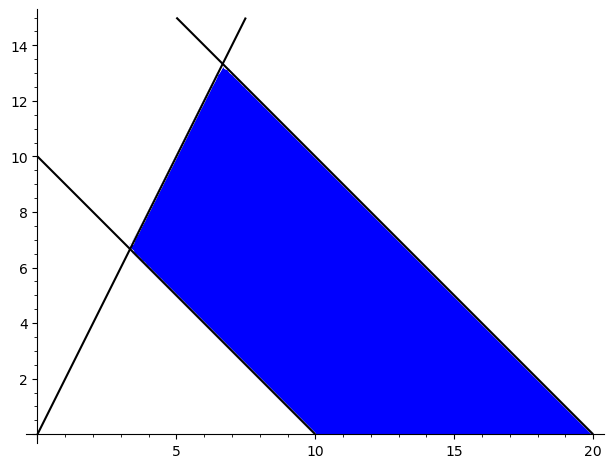

In [94]:
var('x y')
p=region_plot([x+y>=10,2*x-y>=0,x+y<=20],(x,0,20),(y,0,15))
p+=implicit_plot(x+y==10,(x,0,20),(y,0,15),color='black')
p+=implicit_plot(x+y==20,(x,0,20),(y,0,15),color='black')
p+=implicit_plot(2*x-y==0,(x,0,20),(y,0,15),color='black')
#p+=plot(x-3,(x,-10,20),color='black')
show(p,axes=True,frame=False )

### Lineare Optimierung

Ein lineares Optimierungsproblem kann wie folgt definiert werden werden:

In [95]:
p = MixedIntegerLinearProgram()
x = p.new_variable(real=True, nonnegative=True)
p.set_objective(0.05*x[1]+0.06*x[2]+0.09*x[3])
p.add_constraint(x[1]+x[2]+x[3]==20)
p.add_constraint(x[1]+x[2]>=10)
p.add_constraint(2*x[1]-x[2]>=0)

Der Befehl `set_objektive` erklärt die Zielfungkion und mit `add_constraint` werden die Nebenbedingungen hinzugefügt. Die Positivitätsbedingungen sind durch die Option `nonnegative=True` erklärt.

Den Wert des Maximums erhalten wir mit:

In [96]:
p.solve()

1.4666666666666666

Und die Stelle an der es angenommen wird mit:

In [97]:
p.get_values(x)

{1: 3.333333333333333, 2: 6.666666666666667, 3: 10.0}

## Skalarprodukt und Orthogonalität

### Skalarprodukt

Das Skalarprodukt wird mit `dot_product` berechnet:

In [98]:
a=vector([1,2,3])
b=vector([2,4,1])
a.dot_product(b)

13

Alternativ

In [99]:
a*b

13

### Kreuzprodukt

Das Kreuzprodukt wird mit `cross_product` berechnet:

In [100]:
a=vector([1,2,0])
b=vector([3,4,5])
a.cross_product(b)

(10, -5, -2)

### Gram-Schmidt-Verfahren

Das Gram-Schmidt-Verfahren ist als `gram_schmidt` implementiert.

In [101]:
A= matrix([[1, 0, 1], [0, 1, 1], [1, 2, 4]])
G, M = A.gram_schmidt()
G

[   1    0    1]
[-1/2    1  1/2]
[-1/3 -1/3  1/3]

Der Befehl operiert auf Zeilenvektoren und führt keine Normierung durch. Die zweite Matrix ist die zugehörige Transformationsmatrix:

In [102]:
A == M*G

True

Die Normierung kann mit der option `orthonormal=True` erhalten werden. Allerdings muss dazu im Ring der algebraischen Zahlen `AA` gerechnet werden:

In [103]:
A= matrix(AA,[[1, 0, 1], [0, 1, 1], [1, 2, 4]])
A.gram_schmidt(orthonormal=True)[0]

[ 0.7071067811865475?                    0  0.7071067811865475?]
[-0.4082482904638630?  0.8164965809277260?  0.4082482904638630?]
[-0.5773502691896258? -0.5773502691896258?  0.5773502691896258?]

Möchte man die Ausgabe mit Wurzeln, so ist noch

In [104]:
_.apply_map(AlgebraicNumber.radical_expression)

[   1/2*sqrt(2)              0    1/2*sqrt(2)]
[-1/2*sqrt(2/3)      sqrt(2/3)  1/2*sqrt(2/3)]
[    -sqrt(1/3)     -sqrt(1/3)      sqrt(1/3)]

notwendig. Die FUnktion `apply_map` wendet ihr Argument auf jeden Eintrag einer Matrix an.

## Eigenwerte und Eigenvektoren

### Koordinatentransformationen

Die Drehmatrix um die z-Achse ist:

In [105]:
U(phi)=matrix([[cos(phi), -sin(phi), 0],[sin(phi), cos(phi), 0],[0, 0, 1]])
U(pi/4)

[ 1/2*sqrt(2) -1/2*sqrt(2)            0]
[ 1/2*sqrt(2)  1/2*sqrt(2)            0]
[           0            0            1]

Ein gedrehter Vektor

In [106]:
U(-pi/4)*vector([1,3,4])

(2*sqrt(2), sqrt(2), 4)

und eine gedrehte Matrix:

In [107]:
A=matrix([[0,1,0],
[1,0,0],
[0,0,1]])
U(pi/4)^-1*A*U(pi/4)

[ 1  0  0]
[ 0 -1  0]
[ 0  0  1]

### Eigenwerte und Eigenvektoren

Die Eigenwerte werden mit `eigenvalues`

In [108]:
A=matrix([[0,-1],[1,0]])
A.eigenvalues()

[-1*I, 1*I]

und die Eigenvektoren mit `eigenvectors_right` berechnet:

In [109]:
A.eigenvectors_right()

[(-1*I, [(1, 1*I)], 1), (1*I, [(1, -1*I)], 1)]

Die Rückgabe ist eine Liste aus 3-Tupel bestehend aus Eigenwert, Liste der Eigenvektoren und algebraischer Multiplizität.

### Hauptachsentransformation und implizite Kurven

Implizit gegebene Kurven, wie die Ellipse $3x^2 - 2xy + 3y^2 = 4$, kann man mit folgendem Befehl zeichnen:

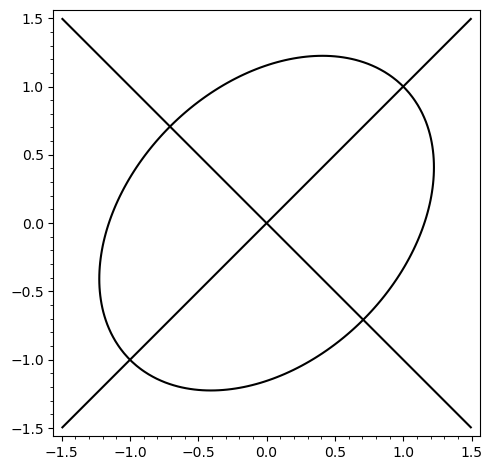

In [110]:
var('x y')
pl=contour_plot(3*x^2 - 2*x*y + 3*y^2,(x,-1.5,1.5),(y,-1.5,1.5),contours=[4],fill=False)
pl+=contour_plot(x-y,(x,-1.5,1.5),(y,-1.5,1.5),contours=[0],fill=False)
pl+=contour_plot(x+y,(x,-1.5,1.5),(y,-1.5,1.5),contours=[0],fill=False)
show(pl)

### Singulärwertzerlegung

Eine Singulärwertzerlegung ist nur über den rellen Zahlen `RDF` möglich:

In [111]:
A=matrix(RDF,[[2,1],[0,1],[1,0]])
U, S, V = A.SVD()

Überprüfen des Ergebnis:

In [112]:
U*S*V.transpose()

[     2.0000000000000004      0.9999999999999999]
[-1.1775675769956483e-16      1.0000000000000002]
[                    1.0 -1.1775675769956485e-16]

Wenn wir auf 15 Stellen runden wird das etwas übersichtlicher:

In [113]:
_.apply_map(lambda x: round(x,15))

[ 2.0  1.0]
[-0.0  1.0]
[ 1.0 -0.0]

Mit dem `lambda` Operator kann man eine Wegwerffunktion erklären, die keinen Namen benötigt, weil sie nur einmal verwendet wird. Hier brauchen wir es, da `round` ohne Angabe der Anzahl der Stellen zur nächsten ganzen Zahl runden würde.

Die letzte Zeile von

In [114]:
S

[2.449489742783178               0.0]
[              0.0               1.0]
[              0.0               0.0]

benötigen wir nicht. Wir entfernen sie mit

In [115]:
S1=S[0:-1,::]

Ebenso können wir die letzte Spalte von

In [116]:
U

[   -0.9128709291752769 -1.024079435509064e-16   -0.40824829046386296]
[  -0.18257418583505533    -0.8944271909999162      0.408248290463863]
[   -0.3651483716701108     0.4472135954999579      0.816496580927726]

entfernen

In [117]:
U1=U[::,0:-1]

Dann gilt immer noch

In [118]:
(U1*S1*V.transpose()).apply_map(lambda x: round(x,15))

[ 2.0  1.0]
[-0.0  1.0]
[ 1.0 -0.0]

Die Pseudoinverse einer Matrix kann nicht direkt berechnet werden. Wir können sie aber über die Singulärwertzerlegung erhalten:

In [119]:
A=matrix(RDF,[[1,0],[1,0]])
U, S, V = A.SVD()

Nun müssen wir alle von 0 verschiedenen Einträge von

In [120]:
S

[1.4142135623730951                0.0]
[               0.0                0.0]

invertieren:

In [121]:
def my_inv(x):
    if (x!=0): return(1/x)
    return(x)
(U*S.apply_map(my_inv)*V.transpose()).apply_map(lambda x: round(x,15))

[0.5 0.0]
[0.5 0.0]

## Grundlagen der Graphentheorie

### Darstellung von Graphen

Graphen können z.B. über die Adjazenzmatrix

In [122]:
A = matrix([[0, 1, 0, 1, 1], [1, 0, 1, 1, 0], [0, 1, 0, 1, 0], [1, 1, 1, 0, 0], [1, 0, 0, 0, 0]])
A

[0 1 0 1 1]
[1 0 1 1 0]
[0 1 0 1 0]
[1 1 1 0 0]
[1 0 0 0 0]

eingegeben und dargestellt werden:

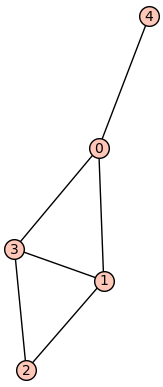

In [123]:
G = Graph(A, format='adjacency_matrix')
G.show()

Die Positionen der Knoten werden automatisch gewüahlt, können aber auch angegeben werden:

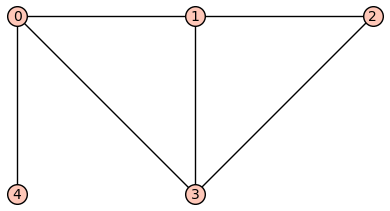

In [124]:
G.show(pos = {0:[0, 1], 1:[1, 1], 2:[2, 1], 3:[1, 0], 4:[0, 0]} )

### Zusammenhang

Mit dem Befehl

In [125]:
G.is_connected()

True

können wir auf Zusammenhang testen.

### Euler Zug

In Sage könnten wir das Beispiel aus dem Buch wie folgt lösen:

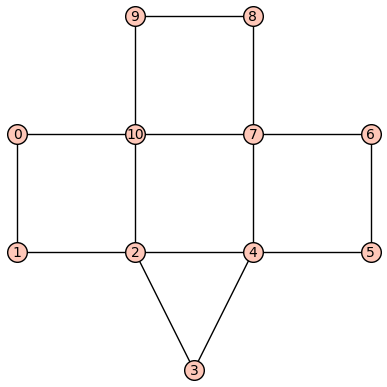

In [126]:
A=matrix([ [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1], [1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0], [0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1], [0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0], [0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0], [0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0], [0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1], [0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0], [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1], [1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0]])
G = Graph(A, format='adjacency_matrix')
G.show(pos= {0:[0, 2], 1:[0, 1], 2:[1, 1], 3:[1.5, 0], 4:[2, 1], 5:[3, 1], 6:[3, 2], 7:[2, 2], 8:[2, 3], 9:[1, 3], 10:[1, 2]})

In [127]:
G.eulerian_circuit()

[(0, 10, None),
 (10, 9, None),
 (9, 8, None),
 (8, 7, None),
 (7, 6, None),
 (6, 5, None),
 (5, 4, None),
 (4, 7, None),
 (7, 10, None),
 (10, 2, None),
 (2, 4, None),
 (4, 3, None),
 (3, 2, None),
 (2, 1, None),
 (1, 0, None)]

### Hamilton Kreis

Einen Hamilton-Kreis erhalten wir mit

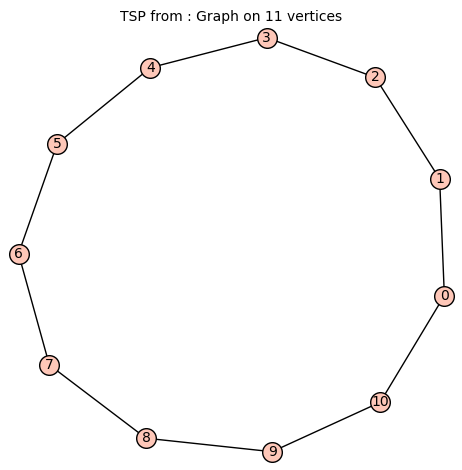

In [128]:
G.hamiltonian_cycle()

## Bäume und kürzeste Wege

### Gewichtete Graphen

Gewichtete Graphen können analog wie ungewichtete Graphen mit einer gewichteten Adjezenzmatrix eingegeben werden. Dabei müssen nicht-vorhandene Kanten durch ein Gewicht 0 gekennzeichnet werden.

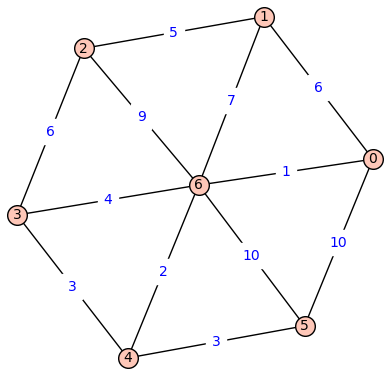

In [129]:
A= matrix([[0, 6, 0, 0, 0, 10, 1], [6, 0, 5, 0, 0, 0, 7], [0, 5, 0, 6, 0, 0, 9], [0, 0, 6, 0, 3, 0, 4], [0, 0, 0, 3, 0, 3, 2], [10, 0, 0, 0, 3, 0, 10], [1, 7, 9, 4, 2, 10, 0]])
G = Graph(A, format='weighted_adjacency_matrix')
G.show(edge_labels=True)

Mit der Option `edge_labels` wird bei der Darstellung das Gewicht zu jeder Kante geschrieben.

### Travelling Salesman Problem

Eine billigste Rundreise in einem Graphen erhalten wir mit

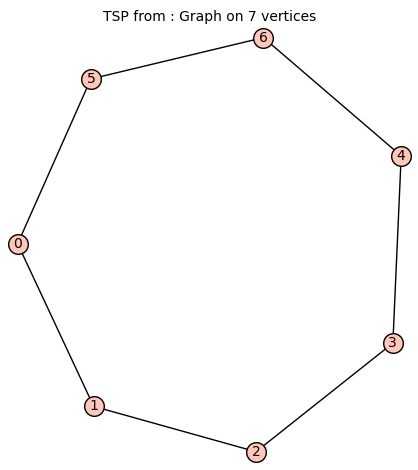

In [130]:
G.traveling_salesman_problem()

Den vollständige Graphen $K_n$ bekommt man übrigens mit `CompleteGraph(n)`.

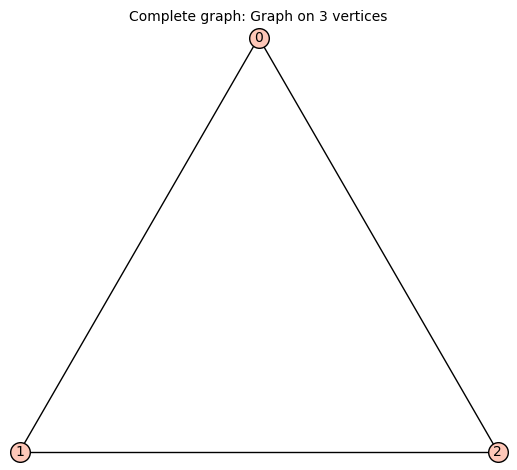

In [131]:
graphs.CompleteGraph(3)

### Minimal aufspannende Bäume

Einen minimal aufspannenden Baum erhalten wir mit

In [132]:
G.min_spanning_tree()

[(1, 2, 5), (2, 3, 6), (3, 4, 3), (4, 6, 2), (4, 5, 3), (0, 6, 1)]

Die Ausgabe enthält die Kanten plus deren Gewicht.

### Kürzeste Wege

Mit Sage kann der kürzeste Weg zwischen zwei Knoten i, j mit dem Befehl `shortest_path(i, j, by_weight=True)` berechnet werden.

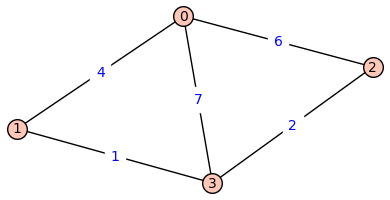

In [133]:
A=matrix([[0, 4, 6, 7], [4, 0, 0, 1], [6, 0, 0, 2], [7, 1, 2, 0]])
G = Graph(A, format='weighted_adjacency_matrix')
G.show(edge_labels=True)

In [134]:
G.shortest_path(0, 3, by_weight=True)

[0, 1, 3]

## Flüsse in Netzwerken und Matchings

### Netzwerke

Den maximalen Fluß erhalten wir mit `flow`:

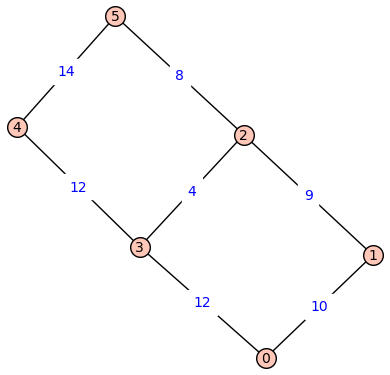

In [135]:
A=matrix([[0, 10, 0, 12, 0, 0], [0, 0, 9, 0, 0, 0], [0, 0, 0, 4, 0, 8], [0, 0, 0, 0, 12, 0], [0, 0, 6, 0, 0, 14], [0, 0, 0, 0, 0, 0]])
G = Graph(A, format='weighted_adjacency_matrix')
G.show(edge_labels=True)

In [136]:
G.flow(0,5)

20

### Matchings

Ein maximales Matchin erhalten wir mit

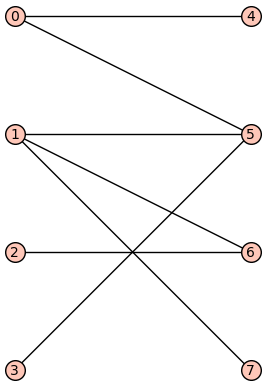

In [137]:
G = Graph([[0,4],[0,5],[1,5],[1,6],[1,7],[2,6],[3,5]])
G.show(pos={0:[0, 3], 1:[0, 2], 2:[0, 1], 3:[0, 0], 4:[2, 3], 5:[2, 2], 6:[2, 1], 7:[2, 0]})

In [138]:
G.matching()

[(0, 4, None), (1, 7, None), (2, 6, None), (3, 5, None)]